# Intro to pytorch with linear regression models 

The objective in this homework is to get familiarity with the basic building blocks in pytorch 

In [2]:
# libraries
import torch 
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

/home/jaren/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# the function to generate the polynomial data 

def generate_poly_data(N, sigma):
  
   np.random.seed(100)
   x = np.random.uniform(low = -1, high = 3, size = N)
   y = [2 * i ** 2 - 3 * i + 1 for i in x] 
   noise = np.random.normal(0, sigma, N)
   y = y + noise
   return x, y
    

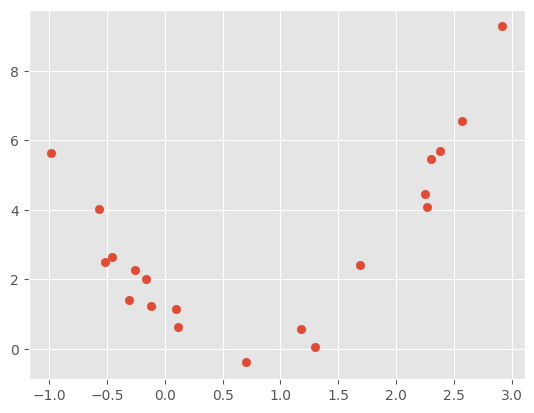

In [4]:
# generate data with N = 20
# we will be using the x, y as the training data for the following questions
x, y = generate_poly_data(20, 0.5)
# plot x and y
plt.scatter(x, y)
plt.show()

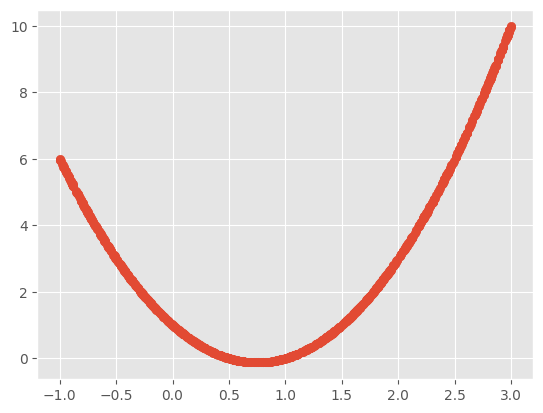

In [5]:
# Our test data 
# we can treat this test data as an approximation to the truth
# we want to make some visual comparisons as well as compute test MSEs
x_test = np.random.uniform(low = -1, high = 3, size = 1000)
y_test = np.array([2 * i ** 2 - 3 * i + 1 for i in x_test]) 
plt.scatter(x_test, y_test)
plt.show()

In [6]:
# We want y = wx + b

class LinearRegressionModule(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.regressionLayer = nn.Linear(input_dim, 1)
        
    def forward(self, x):
        output = self.regressionLayer(x)
        return output 

In [7]:
# Linear regression

class pytorchLR():
    def __init__(self, 
                dimensions = 1,
                 n_epochs = 100,
                weight_decay = 0,
                lr = 10e-3):
        self.dimensions = dimensions
        self.n_epochs = n_epochs
        self.weight_decay = weight_decay
        self.lr = lr
        
    def fit(self, x, y):
        x = torch.tensor(x).float()
        y = torch.tensor(y).float()
        
        self.loss_fn = nn.MSELoss(size_average=False)
    
        self.module = LinearRegressionModule(self.dimensions)
        self.optimizer = torch.optim.SGD(self.module.parameters(), lr=self.lr, weight_decay=self.weight_decay)

        for epoch in range(self.n_epochs):
            outputs = self.module(x)
            loss = self.loss_fn(outputs, y)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            
    def predict(self, x):
        self.module.eval()
        x = torch.tensor(x).float()
        y_hat = self.module(x)
        return y_hat.detach().cpu().numpy()

In [8]:
# Create the model and fit it. For now the model is y = mx + b
model = pytorchLR(dimensions = 1, n_epochs = 5000, weight_decay = 0, lr = 1e-3)
model.fit(x[:, None], y[:, None])

/home/jaren/.local/lib/python3.10/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


8.99655430037913


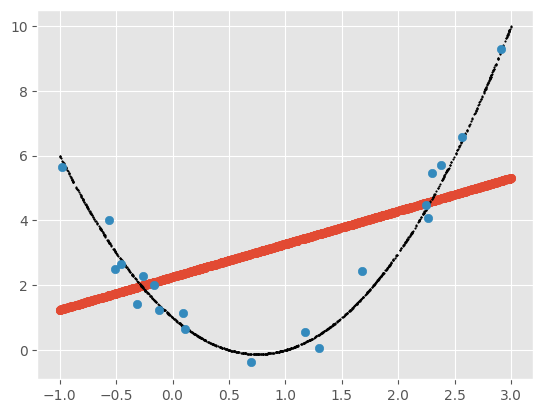

In [94]:
# Plot the predictions and the train data 
y_hat = model.predict(x_test[:, None])
print(np.mean((y_hat - y_test)**2))
plt.scatter(x_test, y_hat)
plt.scatter(x_test, y_test, c = "black", s = 1)
plt.scatter(x, y)
plt.show()

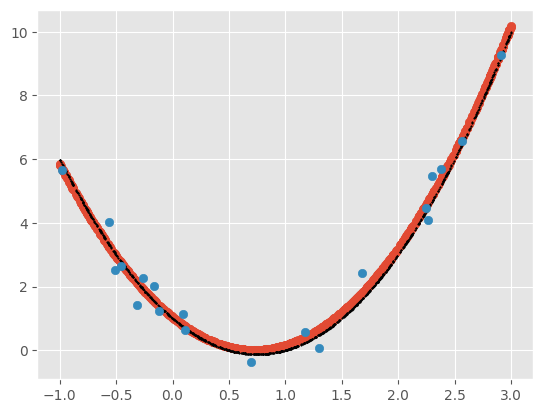

14.52334554836781
[Parameter containing:
tensor([[-2.8471,  1.9653]], requires_grad=True), Parameter containing:
tensor([1.0362], requires_grad=True)]


In [81]:
# We known the true model is an 2nd order polynomial 
'''*** Create the data for the x and x**2, fit the model, and plot as above the training data and the predictions of the test data.
Then print the parameters of your regressionLayer or your model.module.
Did you obtain something close to the true parameters?
***'''

x2 = np.array([x, x**2]).transpose()
y2 = np.array([y,y]).transpose()
x2_test = np.array([x_test, x_test**2]).transpose()

model = pytorchLR(dimensions=2, n_epochs = 5000, weight_decay = 0, lr = 0.001)
model.fit(x2[:, None], y2[:, None])

y_hat = model.predict(x2_test)
plt.scatter(x_test, y_hat)
plt.scatter(x_test, y_test, c = "black", s = 1)
plt.scatter(x, y)
plt.show()
print(np.mean((y_hat - y_test)**2))
print(list(model.module.parameters()))




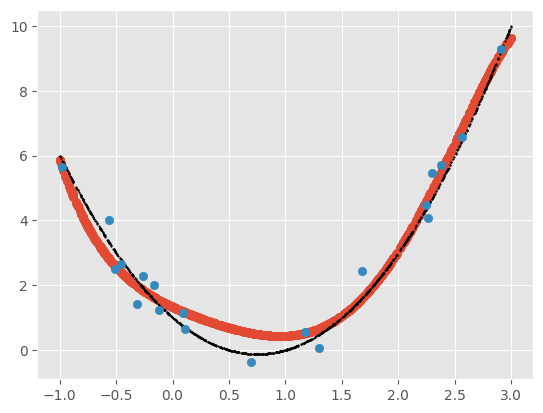

13.781991690041451
[Parameter containing:
tensor([[-1.6308,  0.9545, -0.9225,  0.8752, -0.1702]], requires_grad=True), Parameter containing:
tensor([1.3304], requires_grad=True)]


In [80]:
'''*** Create the data for a 5 degree polynomial and fit it. Should you get a better MSE than for the previous two models?.
hint: you might need to play with the learning rate until you obtain a good value
***'''

x5 = np.array([x, x**2, x**3, x**4, x**5]).transpose()
y5 = np.array([y,y,y,y,y]).transpose()
x5_test = np.array([x_test, x_test**2, x_test**3, x_test**4, x_test**5]).transpose()

model = pytorchLR(dimensions=5, n_epochs = 20000, weight_decay = 0, lr = 0.000002)
model.fit(x5[:, None], y5[:, None])

y_hat = model.predict(x5_test)
plt.scatter(x_test, y_hat)
plt.scatter(x_test, y_test, c = "black", s = 1)
plt.scatter(x, y)
plt.show()

print(np.mean((y_hat - y_test)**2))
print(list(model.module.parameters()))

In [95]:
'''*** Create a for loop for different values of sigma = [0.1, 0.5, 1], and N = [15, 100]
use a 5 degree polynomial model with different values for regularization 
weight_decay = [0, 0.2, 0.5], compute the testing error 
***'''
 
for sigma in [0.1, 0.5, 1]:
    for N in [15, 100]:
        x, y = generate_poly_data(N, sigma)
        x5 = np.array([x, x**2, x**3, x**4, x**5]).transpose()
        y5 = np.array([y,y,y,y,y]).transpose()
        x5_test = np.array([x_test, x_test**2, x_test**3, x_test**4, x_test**5]).transpose()
        
        for weight_decay in [0, 0.2, 0.5]:
            model = pytorchLR(dimensions=5, n_epochs = 40000, weight_decay = weight_decay, lr = 0.0000002)
            model.fit(x5[:, None], y5[:, None])
            y_hat = model.predict(x5_test)
            mse = np.mean((y_hat - y_test)**2)
            print(f"sigma: {sigma}, N: {N}, weight_decay: {weight_decay}, mse: {round(mse, 4)}")

/home/jaren/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([15, 1, 5])) that is different to the input size (torch.Size([15, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


sigma: 0.1, N: 15, weight_decay: 0, mse: 12.6437
sigma: 0.1, N: 15, weight_decay: 0.2, mse: 12.7201
sigma: 0.1, N: 15, weight_decay: 0.5, mse: 13.3812


/home/jaren/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([100, 1, 5])) that is different to the input size (torch.Size([100, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


sigma: 0.1, N: 100, weight_decay: 0, mse: 13.9429
sigma: 0.1, N: 100, weight_decay: 0.2, mse: 13.9773
sigma: 0.1, N: 100, weight_decay: 0.5, mse: 13.9847
sigma: 0.5, N: 15, weight_decay: 0, mse: 11.7452
sigma: 0.5, N: 15, weight_decay: 0.2, mse: 12.1898
sigma: 0.5, N: 15, weight_decay: 0.5, mse: 11.3185
sigma: 0.5, N: 100, weight_decay: 0, mse: 13.8184
sigma: 0.5, N: 100, weight_decay: 0.2, mse: 13.8462
sigma: 0.5, N: 100, weight_decay: 0.5, mse: 13.8387
sigma: 1, N: 15, weight_decay: 0, mse: 11.467
sigma: 1, N: 15, weight_decay: 0.2, mse: 10.7045
sigma: 1, N: 15, weight_decay: 0.5, mse: 10.4512
sigma: 1, N: 100, weight_decay: 0, mse: 13.738
sigma: 1, N: 100, weight_decay: 0.2, mse: 13.7235
sigma: 1, N: 100, weight_decay: 0.5, mse: 13.6696
